In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
import seaborn as sns

In [2]:
#載入數據
bank_analysis=pd.read_csv('bank-additional.csv',sep=';',error_bad_lines=False)
bank_analysis.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
#查看數據結構
print(bank_analysis.shape)
print(bank_analysis.columns)

(4119, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [15]:
#查看是否有缺失值
bank_analysis.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

>查看各個特徵可視化

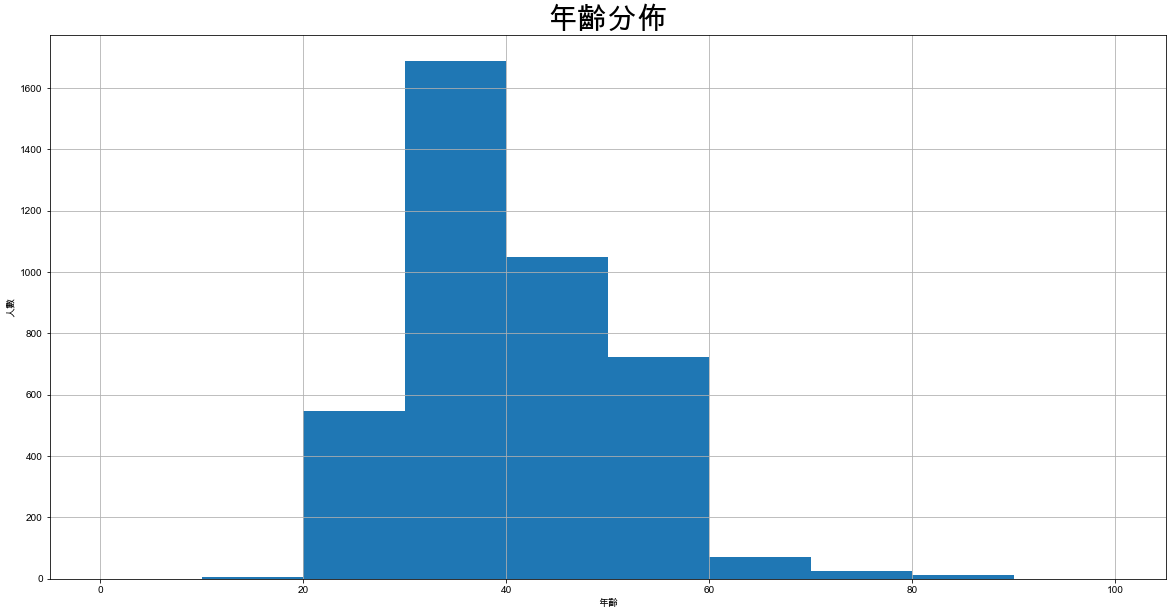

In [127]:
#年齡分佈
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
bank_analysis.age.hist(bins=[0, 10, 20, 30, 40, 50,60,70,80,90,100])
plt.title('年齡分佈',fontsize=30)
plt.xlabel('年齡')
plt.ylabel('人數')
plt.savefig('年齡分佈.jpg')
plt.show()

In [124]:
for k,g in groupby(sorted(bank_analysis['age'].values),key=lambda x:x//10):
    print('{}歲~{}歲:{}人'.format(k*10,(k+1)*10-1,len(list(g))))

10歲~19歲:4人
20歲~29歲:547人
30歲~39歲:1688人
40歲~49歲:1048人
50歲~59歲:722人
60歲~69歲:71人
70歲~79歲:26人
80歲~89歲:13人


admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64


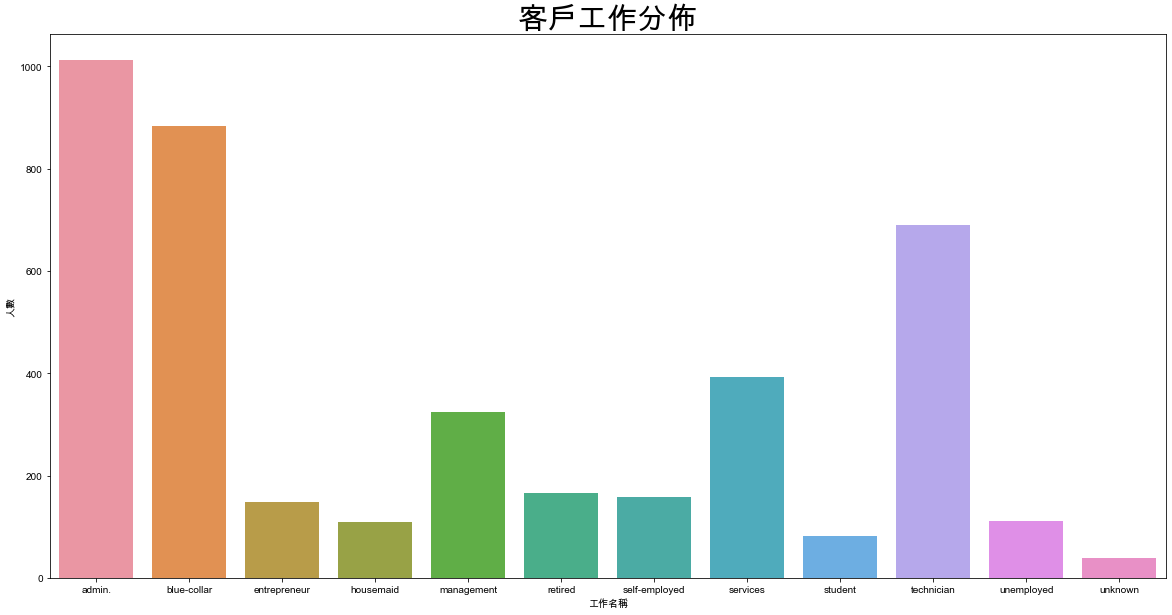

In [128]:
#工作狀況
bank_job=bank_analysis.groupby('job').count()
print(bank_analysis['job'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_job.index,bank_job.values[:,1])
plt.title('客戶工作分佈',fontsize=30)
plt.xlabel('工作名稱')
plt.ylabel('人數')
plt.savefig('客戶工作分佈.jpg')
plt.show()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64


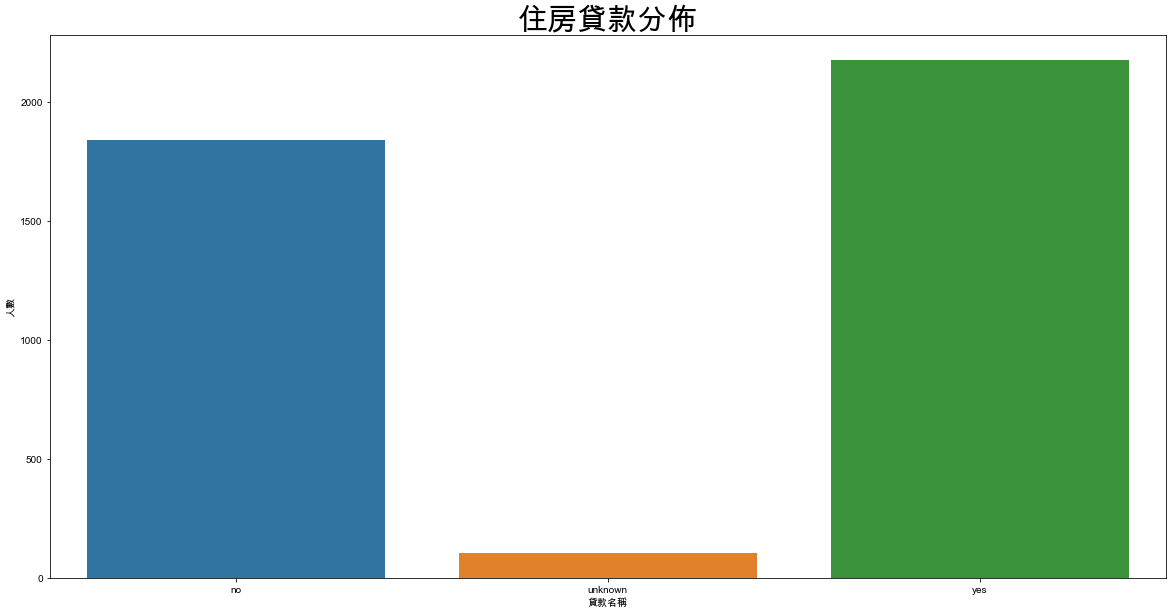

In [129]:
#住房貸款分佈
bank_housing=bank_analysis.groupby('housing').count()
print(bank_analysis['housing'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_housing.index,bank_housing.values[:,1])
plt.title('住房貸款分佈',fontsize=30)
plt.xlabel('貸款名稱')
plt.ylabel('人數')
plt.savefig('住房貸款分佈.jpg')
plt.show()

no         3349
yes         665
unknown     105
Name: loan, dtype: int64


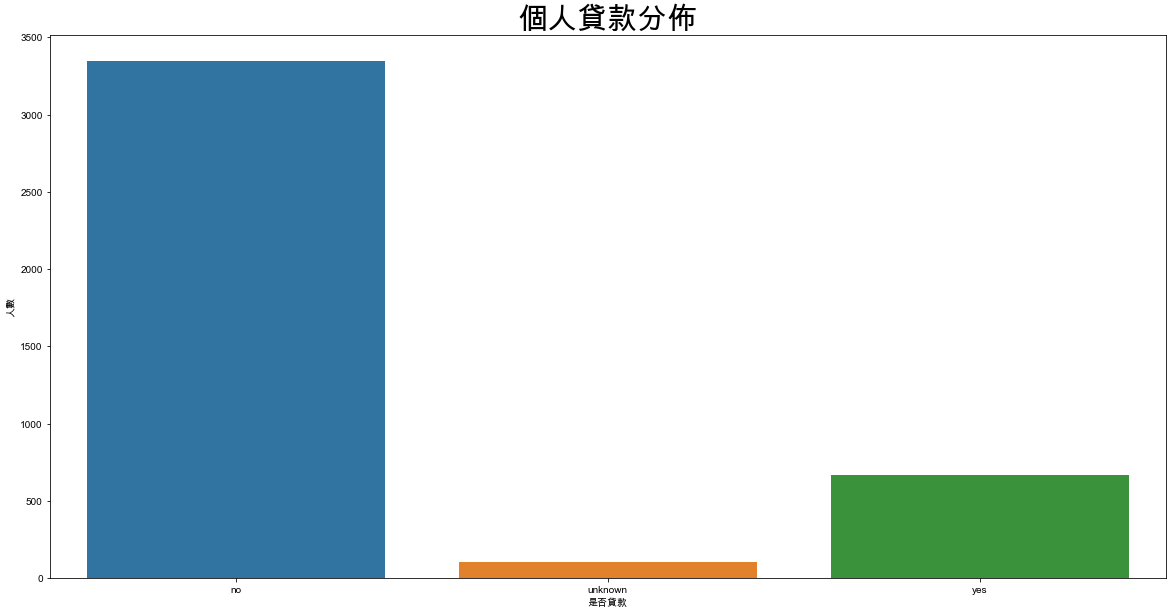

In [130]:
#個人貸款分佈
bank_loan=bank_analysis.groupby('loan').count()
print(bank_analysis['loan'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_loan.index,bank_loan.values[:,1])
plt.title('個人貸款分佈',fontsize=30)
plt.xlabel('是否貸款')
plt.ylabel('人數')
plt.savefig('個人貸款分佈.jpg')
plt.show()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64


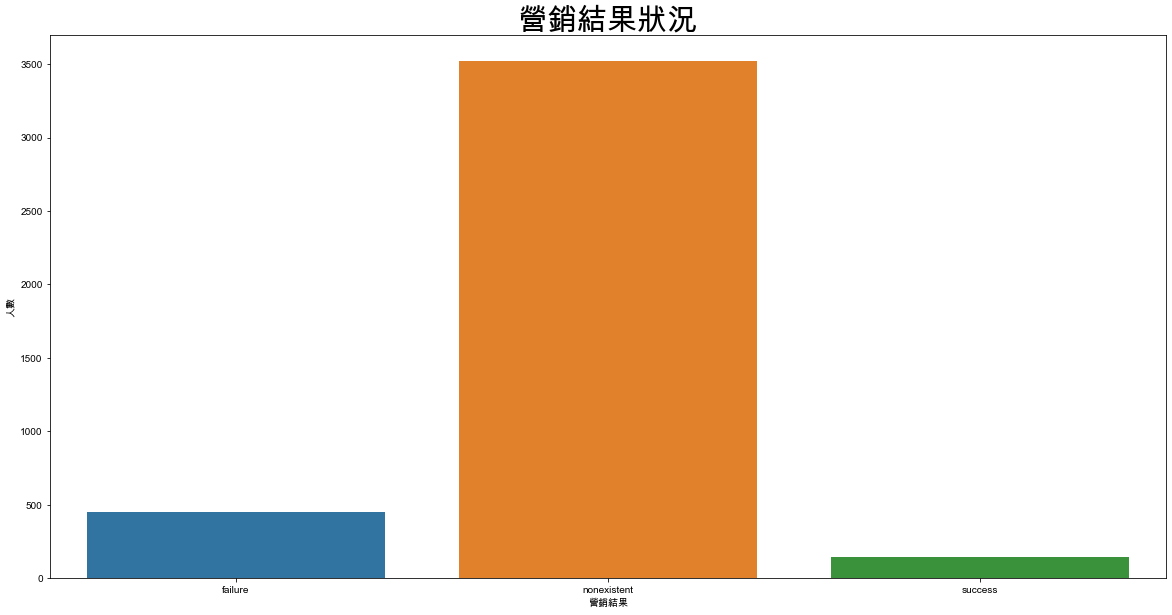

In [131]:
#營銷結果
bank_poutcome=bank_analysis.groupby('poutcome').count()
print(bank_analysis['poutcome'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_poutcome.index,bank_poutcome.values[:,1])
plt.title('營銷結果狀況',fontsize=30)
plt.xlabel('營銷結果')
plt.ylabel('人數')
plt.savefig('營銷結果狀況.jpg')
plt.show()

>>沒有回應以及失敗比例非常高

>查看是什麼原因造成這結果

999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
9         3
1         3
13        2
18        2
16        2
15        2
0         2
14        1
19        1
21        1
17        1
11        1
Name: pdays, dtype: int64


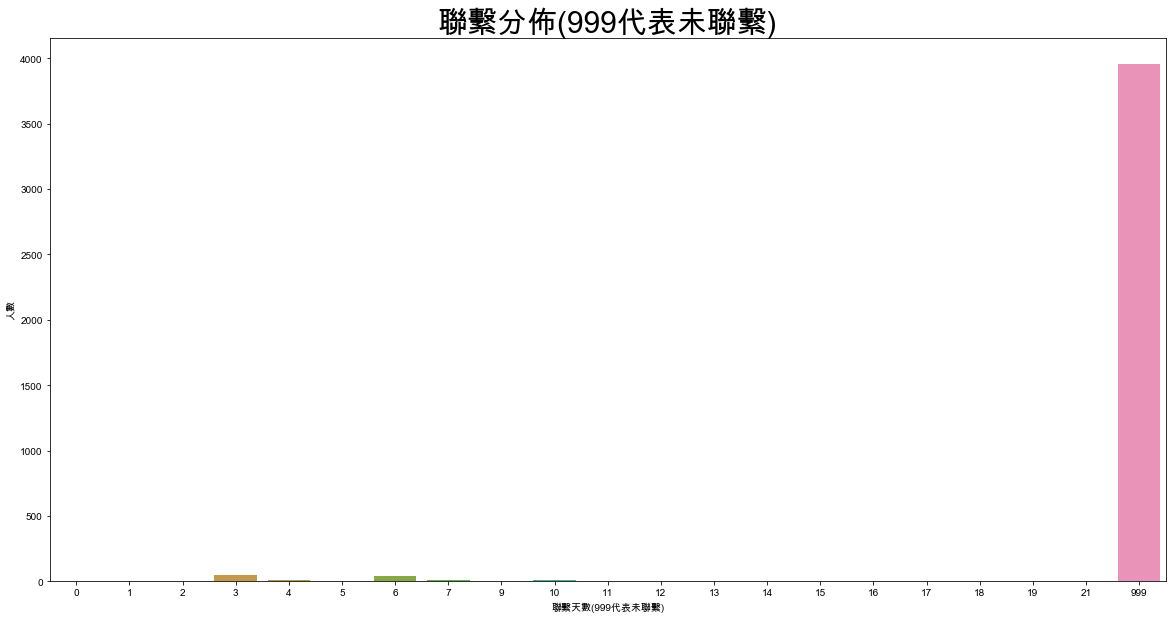

In [132]:
#看聯繫次數對營銷結果
bank_Marketing=bank_analysis.groupby('pdays').count()
print(bank_analysis['pdays'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_Marketing.index,bank_Marketing.values[:,1])
plt.title('聯繫分佈(999代表未聯繫)',fontsize=30)
plt.xlabel('聯繫天數(999代表未聯繫)')
plt.ylabel('人數')
plt.savefig('聯繫分佈(999代表未聯繫).jpg')
plt.show()

0    3523
1     475
2      78
3      25
4      14
6       2
5       2
Name: previous, dtype: int64


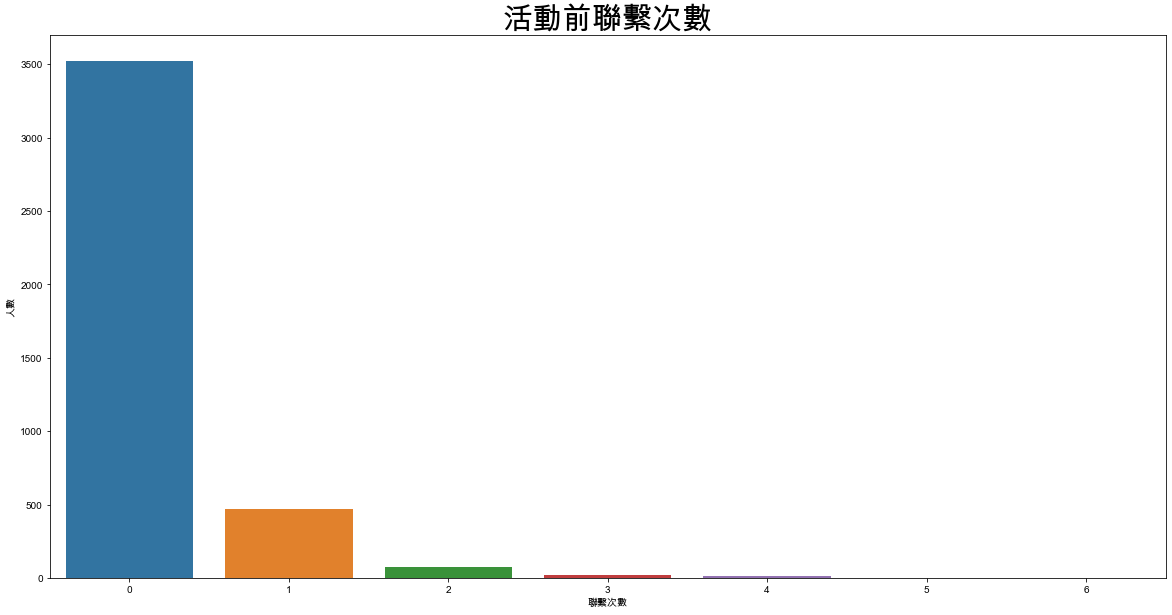

In [133]:
#活動前聯繫次數
bank_previous=bank_analysis.groupby('previous').count()
print(bank_analysis['previous'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_previous.index,bank_previous.values[:,1])
plt.title('活動前聯繫次數',fontsize=30)
plt.xlabel('聯繫次數')
plt.ylabel('人數')
plt.savefig('活動前聯繫次數.jpg')
plt.show()

In [135]:
#聯繫持續時間，以秒為單位
bank_duration=bank_analysis.groupby('duration').count()
alla=bank_analysis['duration'].value_counts()
print(alla.index.max())
print(alla.index.min())

3643
0


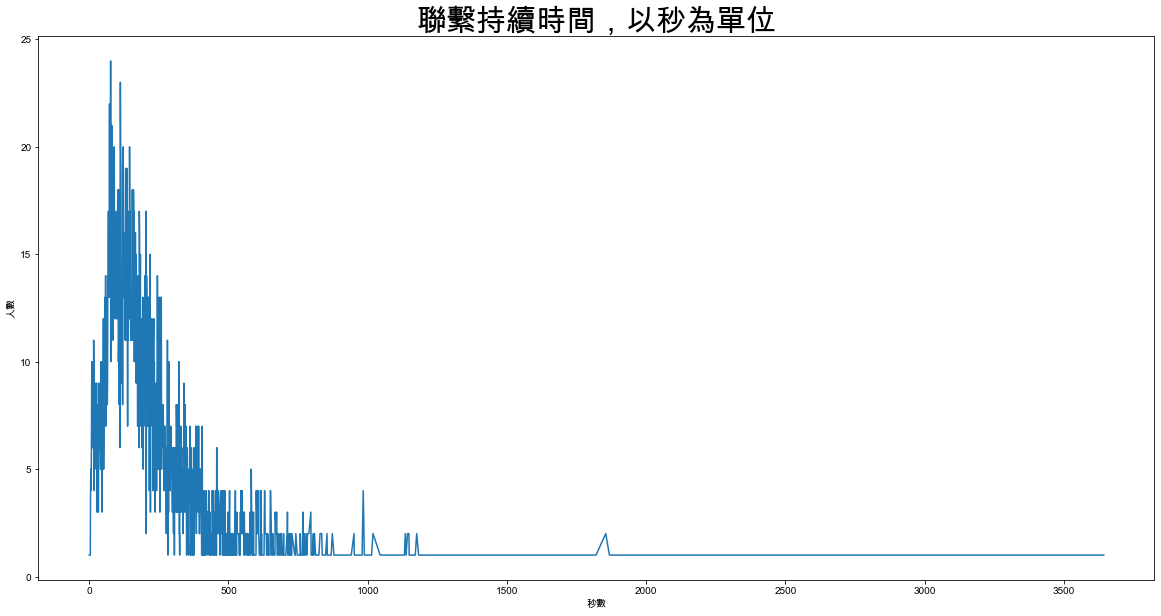

In [136]:
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
plt.plot(bank_duration.index,bank_duration.values[:,1])
plt.title('聯繫持續時間，以秒為單位',fontsize=30)
plt.xlabel('秒數')
plt.ylabel('人數')
plt.savefig('聯繫持續時間.jpg')
plt.show()

>>分析聯繫結果對於營銷結果影響

In [34]:
bank_analysis['pdays']=bank_analysis['pdays'].astype(int)

In [42]:
#nonexistent
df_nonexistent=bank_analysis.loc[bank_analysis['poutcome']=='nonexistent']
df_1=df_nonexistent.groupby('pdays')['poutcome'].count()
df_1

pdays
999    3523
Name: poutcome, dtype: int64

In [50]:
#failure
df_failure=bank_analysis.loc[bank_analysis['poutcome']=='failure']
df_2=df_failure.groupby('pdays')['poutcome'].count()
df_2

pdays
3        2
6        3
7        1
9        2
10       2
12       1
13       1
14       1
15       1
17       1
18       2
21       1
999    436
Name: poutcome, dtype: int64

In [44]:
#success
df_success=bank_analysis.loc[bank_analysis['poutcome']=='success']
df_3=df_success.groupby('pdays')['poutcome'].count()
df_3

pdays
0      2
1      3
2      4
3     50
4     14
5      4
6     39
7      9
9      1
10     6
11     1
12     4
13     1
15     1
16     2
19     1
Name: poutcome, dtype: int64

>>活動前聯繫對於客戶的影響

In [51]:
#nonexistent
df_nonexistentpre=bank_analysis.loc[bank_analysis['poutcome']=='nonexistent']
df_nonexistentpre=df_nonexistentpre.groupby('previous')['poutcome'].count()
df_nonexistentpre

previous
0    3523
Name: poutcome, dtype: int64

In [52]:
#failure
df_failurepre=bank_analysis.loc[bank_analysis['poutcome']=='failure']
df_failurepre=df_failurepre.groupby('previous')['poutcome'].count()
df_failurepre

previous
1    384
2     53
3      9
4      8
Name: poutcome, dtype: int64

In [53]:
#success
df_successpre=bank_analysis.loc[bank_analysis['poutcome']=='success']
df_successpre=df_successpre.groupby('previous')['poutcome'].count()
df_successpre

previous
1    91
2    25
3    16
4     6
5     2
6     2
Name: poutcome, dtype: int64

>>分析訂閱結果

In [94]:
bank_y=bank_analysis.groupby('y').count()
print(bank_analysis['y'].value_counts())
print()
print(bank_analysis['poutcome'].value_counts())

no     3668
yes     451
Name: y, dtype: int64

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64


>>分析聯繫結果對於訂閱結果影響

In [55]:
#no
dfy_no=bank_analysis.loc[bank_analysis['y']=='no']
dfy_no=dfy_no.groupby('pdays')['y'].count()
dfy_no

pdays
1         3
2         3
3        13
4         9
6        15
7         2
9         2
10        2
11        1
12        2
13        2
14        1
15        1
16        2
17        1
18        1
999    3608
Name: y, dtype: int64

In [56]:
#yes
dfy_yes=bank_analysis.loc[bank_analysis['y']=='yes']
dfy_yes=dfy_yes.groupby('pdays')['y'].count()
dfy_yes

pdays
0        2
2        1
3       39
4        5
5        4
6       27
7        8
9        1
10       6
12       3
15       1
18       1
19       1
21       1
999    351
Name: y, dtype: int64

>消費者價格指數 - 月度指標

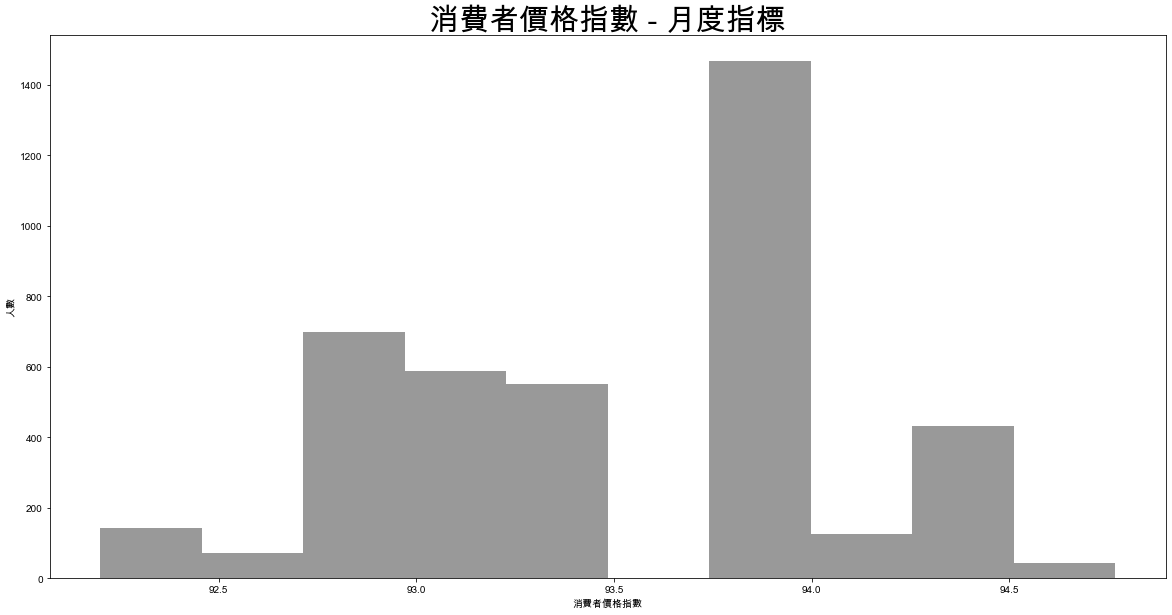

In [137]:
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
plt.hist(bank_analysis['cons.price.idx'],color='0.6')
plt.title('消費者價格指數 - 月度指標',fontsize=30)
plt.xlabel('消費者價格指數')
plt.ylabel('人數')
plt.savefig('消費者價格指數.jpg')
plt.show()

>就業變化率 - 季度指標

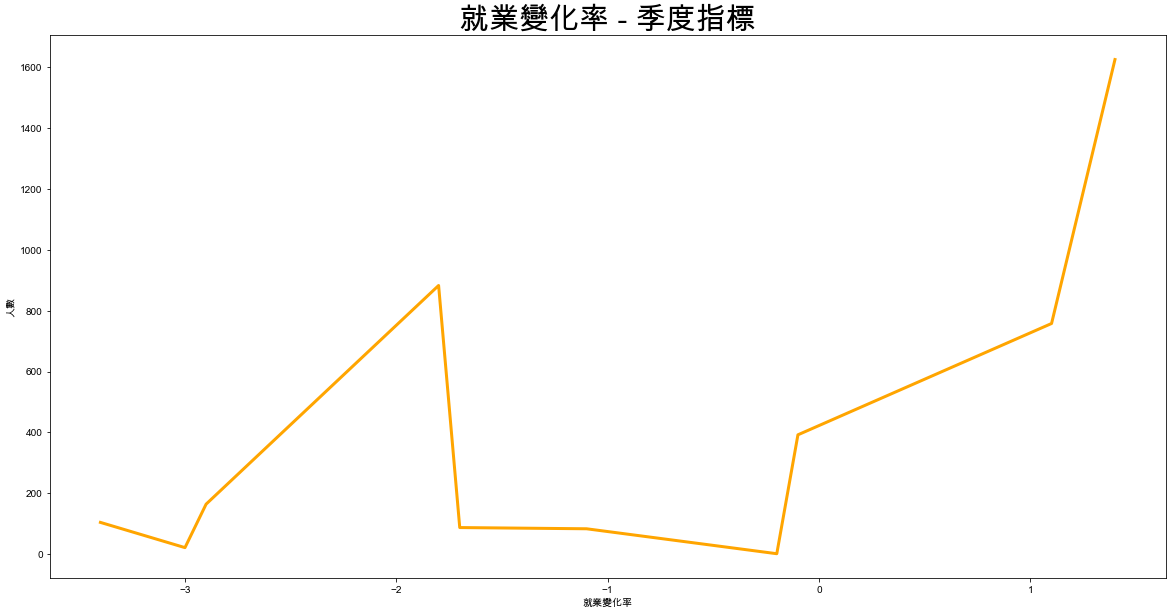

In [138]:
bank_emp=bank_analysis.groupby('emp.var.rate').count()
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
plt.plot(bank_emp.index,bank_emp.values[:,0],color='orange',linewidth=3)
plt.title('就業變化率 - 季度指標',fontsize=30)
plt.xlabel('就業變化率')
plt.ylabel('人數')
plt.savefig('就業變化率.jpg')
plt.show()

>消費者信心指數 - 月度指標

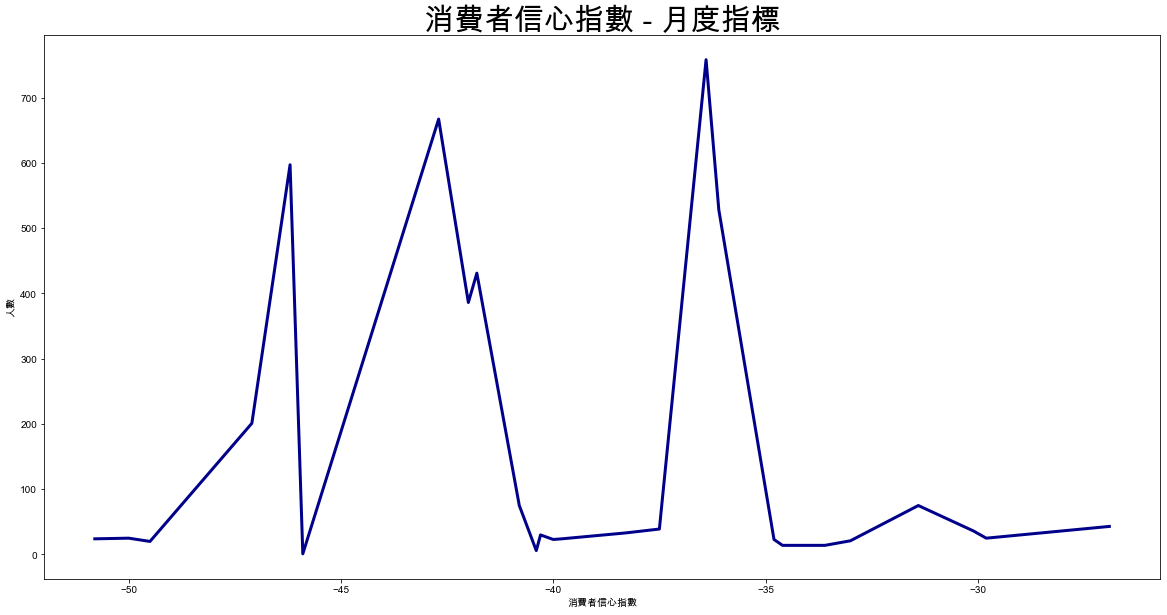

In [139]:
bank_conf=bank_analysis.groupby('cons.conf.idx').count()
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
plt.plot(bank_conf.index,bank_conf.values[:,0],color='darkblue',linewidth=3)
plt.title('消費者信心指數 - 月度指標',fontsize=30)
plt.xlabel('消費者信心指數')
plt.ylabel('人數')
plt.savefig('消費者信心指數.jpg')
plt.show()

>3 個月利率 - 日指標

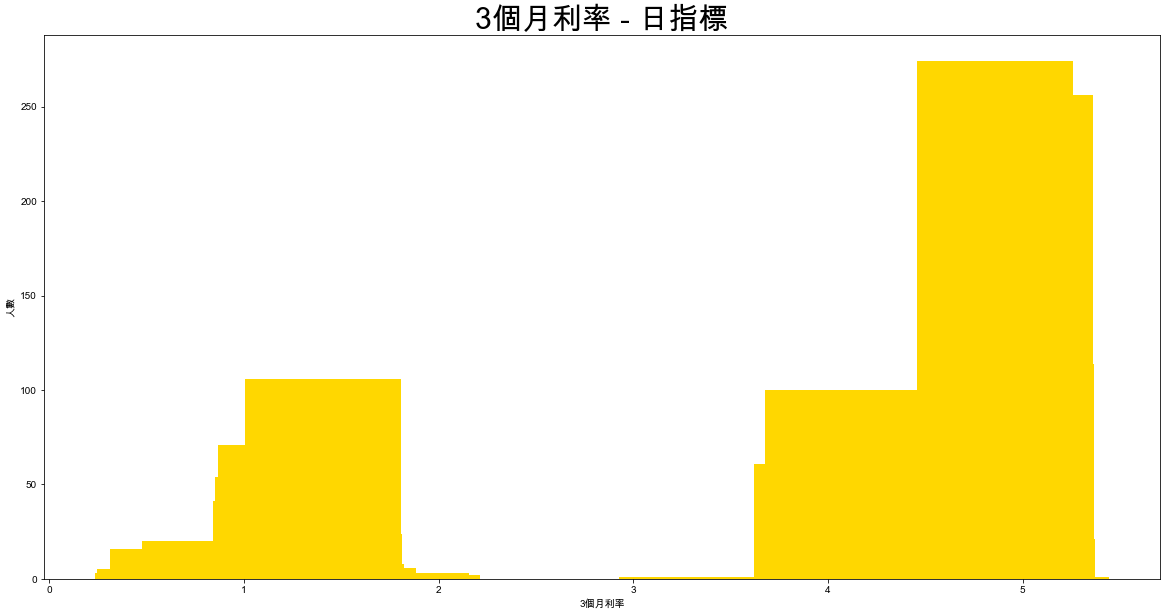

In [140]:
bank_eur=bank_analysis.groupby('euribor3m').count()
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
plt.bar(bank_eur.index,bank_eur.values[:,0],color='gold')
plt.title('3個月利率 - 日指標',fontsize=30)
plt.xlabel('3個月利率')
plt.ylabel('人數')
plt.savefig('3個月利率.jpg')
plt.show()

>年齡和訂閱人數統計

yes人數為451人  no人數為3668人


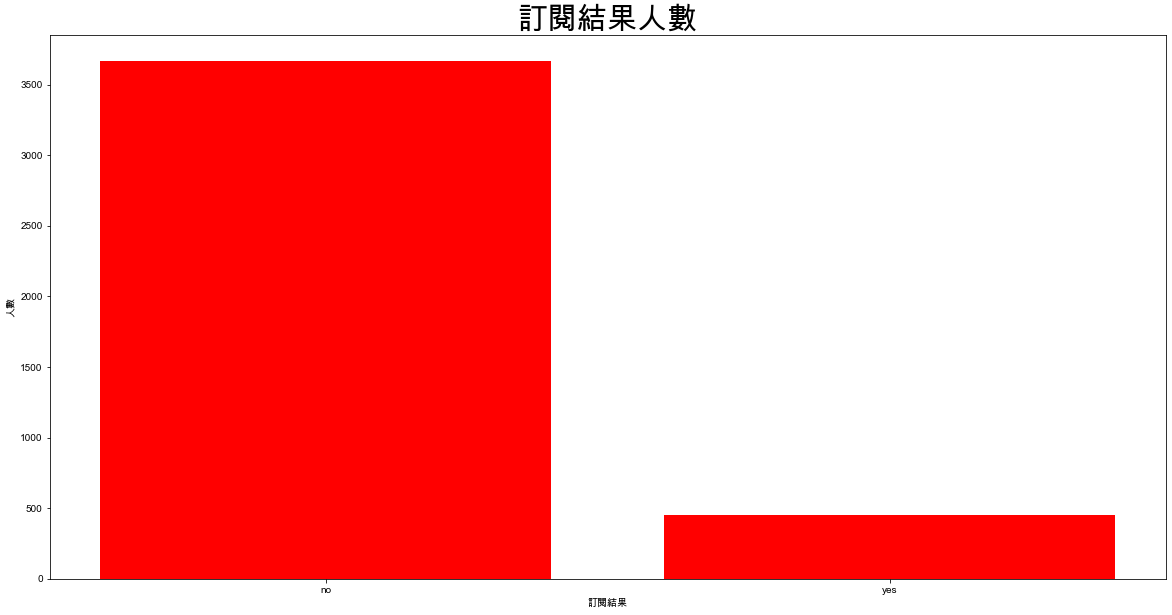

In [141]:
bank_y=bank_analysis.groupby('y').count()
print('yes人數為{}人  no人數為{}人'.format(bank_y.values[:,0][1],bank_y.values[:,0][0]))
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
plt.bar(bank_y.index,bank_y.values[:,0],color='red')
plt.title('訂閱結果人數',fontsize=30)
plt.xlabel('訂閱結果')
plt.ylabel('人數')
plt.savefig('訂閱結果人數.jpg')
plt.show()

In [92]:
from itertools import groupby

In [126]:
#yes
bank_yes=bank_analysis.loc[bank_analysis['y']=='yes']
print('------有訂閱各年齡層人數------')
for k,g in groupby(sorted(bank_yes['age'].values),key=lambda x:x//10):
    print('{}歲~{}歲:{}人'.format(k*10,(k+1)*10-1,len(list(g))))

------有訂閱各年齡層人數------
10歲~19歲:1人
20歲~29歲:66人
30歲~39歲:173人
40歲~49歲:83人
50歲~59歲:87人
60歲~69歲:22人
70歲~79歲:10人
80歲~89歲:9人


In [125]:
#no
bank_no=bank_analysis.loc[bank_analysis['y']=='no']
print('------沒有訂閱各年齡層人數------')
for k,g in groupby(sorted(bank_no['age'].values),key=lambda x:x//10):
    print('{}歲~{}歲:{}人'.format(k*10,(k+1)*10-1,len(list(g))))

------沒有訂閱各年齡層人數------
10歲~19歲:3人
20歲~29歲:481人
30歲~39歲:1515人
40歲~49歲:965人
50歲~59歲:635人
60歲~69歲:49人
70歲~79歲:16人
80歲~89歲:4人
